In [ ]:
!conda config --add channels conda-forge
!conda config --set channel_priority strict

In [ ]:
!conda install airflow

In [1]:
#packages

import os
from pathlib import Path

import csv
import pandas as pd
import datetime as DT #to get age value
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

#regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

PATH = str(Path(os.getcwd()).parent)


In [2]:
type(PATH)

str

In [3]:
#read in data
#neighorhoods
data1 = pd.read_csv(PATH+"/Data/Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")


In [4]:
data1.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30
0,274772,0,Northeast Dallas,Neighborhood,TX,TX,Dallas,Dallas-Fort Worth-Arlington,Dallas County,133957.0,...,329919.0,329699.0,329320.0,329442.0,330733.0,332540.0,334662.0,336913.0,338800.0,341125.0
1,112345,1,Maryvale,Neighborhood,AZ,AZ,Phoenix,Phoenix-Mesa-Scottsdale,Maricopa County,NaN,...,190873.0,192848.0,194789.0,197094.0,199738.0,202351.0,204756.0,207493.0,210739.0,214674.0
2,192689,2,Paradise,Neighborhood,NV,NV,Las Vegas,Las Vegas-Henderson-Paradise,Clark County,135858.0,...,260933.0,261867.0,262567.0,264458.0,266139.0,267250.0,267744.0,269076.0,271727.0,275313.0
3,270958,3,Upper West Side,Neighborhood,NY,NY,New York,New York-Newark-Jersey City,New York County,226951.0,...,1121653.0,1121390.0,1116455.0,1106338.0,1106268.0,1105694.0,1105580.0,1111979.0,1118736.0,1126443.0
4,118208,4,South Los Angeles,Neighborhood,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,133922.0,...,518675.0,522589.0,527759.0,533182.0,537938.0,540725.0,544009.0,549893.0,558240.0,567059.0


In [5]:
data1.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '1996-01-31',
       ...
       '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
       '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30'],
      dtype='object', length=306)

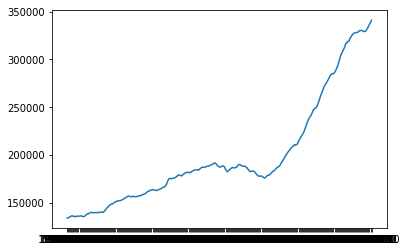

In [7]:
plt.plot(data1.iloc[0,9:])
plt.show()

In [11]:
zhvi_zipcodes = pd.read_csv(PATH+"/Data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")

In [12]:
print(zhvi_zipcodes.head())
print(zhvi_zipcodes.columns)

   RegionID  SizeRank  RegionName RegionType StateName State      City  \
0     61639         0       10025        Zip        NY    NY  New York   
1     84654         1       60657        Zip        IL    IL   Chicago   
2     61637         2       10023        Zip        NY    NY  New York   
3     91982         3       77494        Zip        TX    TX      Katy   
4     84616         4       60614        Zip        IL    IL   Chicago   

                              Metro       CountyName  1996-01-31  ...  \
0       New York-Newark-Jersey City  New York County    223469.0  ...   
1          Chicago-Naperville-Elgin      Cook County    205864.0  ...   
2       New York-Newark-Jersey City  New York County    227596.0  ...   
3  Houston-The Woodlands-Sugar Land    Harris County    202808.0  ...   
4          Chicago-Naperville-Elgin      Cook County    276752.0  ...   

   2020-01-31  2020-02-29  2020-03-31  2020-04-30  2020-05-31  2020-06-30  \
0   1152491.0   1129471.0   1101051.0  

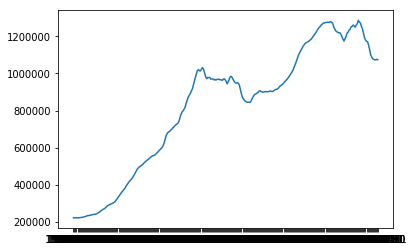

In [13]:
plt.plot(zhvi_zipcodes.iloc[0,9:])
plt.show()

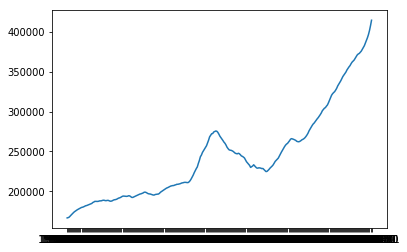

In [19]:
#plot based on zipcode of interest
zipcode = 84075
row = zhvi_zipcodes.loc[zhvi_zipcodes['RegionName']==zipcode].index[0]
plt.plot(zhvi_zipcodes.iloc[row,9:])
plt.show()

In [14]:
zhvi_zipcodes.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,223469.0,...,1152491.0,1129471.0,1101051.0,1088618.0,1078931.0,1075287.0,1072738.0,1072625.0,1075648.0,1073416.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,205864.0,...,476938.0,478070.0,479687.0,480848.0,481240.0,481907.0,483484.0,485902.0,489188.0,492585.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,227596.0,...,1105727.0,1118319.0,1118234.0,1126375.0,1129930.0,1132927.0,1133142.0,1136998.0,1149940.0,1152889.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,202808.0,...,339589.0,339794.0,340299.0,341466.0,342543.0,343323.0,343861.0,344957.0,346034.0,347871.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,276752.0,...,619001.0,619244.0,619927.0,619687.0,619649.0,619916.0,621376.0,623279.0,626620.0,629989.0


In [37]:
#Read in daily temps file (in this case, just from the Acton CA station. Can request more as needed)
daily_temps1 = pd.read_csv(PATH+"/Data/NOAA_ActonCA_DailyTemps.csv")
daily_temps1.head()
#min,max,avg temperature per day

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-01-01,54,61,46
1,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-01-02,53,62,43
2,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-01-03,48,69,35
3,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-01-04,45,61,33
4,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-01-05,50,65,38


In [38]:
daily_temps1.dtypes

STATION    object
NAME       object
DATE       object
TAVG        int64
TMAX        int64
TMIN        int64
dtype: object

In [42]:
#converts date column into timestamp format
daily_temps1['DATE'] = pd.to_datetime(daily_temps1.DATE)


KeyError: 0

In [43]:
#confirm it worked
daily_temps1[0]['DATE'].month

KeyError: 0

In [40]:
daily_grouped = daily_temps1.groupby(pd.Grouper(key='DATE',freq='M'))

In [41]:
daily_grouped.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-01-01,54,61,46
1,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-01-02,53,62,43
2,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-01-03,48,69,35
3,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-01-04,45,61,33
4,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-01-05,50,65,38
31,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-02-01,49,58,46
32,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-02-02,52,60,47
33,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-02-03,48,52,43
34,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-02-04,52,70,41
35,USR0000CACT,"ACTON CALIFORNIA, CA US",1996-02-05,52,66,43


In [ ]:
np.percentile(freq_visited_data.h1_r1,50)

In [ ]:
grindhouse_visitors.head()

In [ ]:
grindhouse_visitors.venue_name.unique()

In [ ]:
all_visitors.head()

In [ ]:
grindhouse_visitors.shape

In [ ]:
grindhouse_visitors.columns

In [ ]:
all_visitors.shape

In [ ]:
all_visitors.columns

In [ ]:
grindhouse_maids=grindhouse_visitors.maid.unique()
grindhouse_maids.shape

In [ ]:
type(grindhouse_maids)

In [ ]:
all_visitors['matched']=np.where(df.maid ==)

In [ ]:
grindhouse_POI = all_visitors[all_visitors['maid'].isin(grindhouse_maids)].copy()

In [ ]:
grindhouse_POI.shape

In [ ]:
grindhouse_POI.maid.nunique()

# ^ 2136 maids to work with, and our dataset is __

In [ ]:
maid_observation_counts = grindhouse_POI.maid.value_counts()
maid_observation_counts.to_csv('maid_observation_counts.csv')
maid_observation_counts.head()

In [ ]:
np.percentile(maid_observation_counts.values,75)

In [ ]:
stats.describe(maid_observation_counts.values)

In [ ]:
grindhouse_maids.shape

In [ ]:
all_visitors_maids = all_visitors.maid.unique()
all_visitors_maids.shape

In [ ]:
#all_visitors_maids = all_visitors.maid.unique().reshape((1,-1))
#grindhouse_maids.reshape((1,-1))
check1 = np.concatenate((grindhouse_maids,all_visitors_maids))

In [ ]:
np.unique(check1).size
#This should be equal to grindhouse_POI.maid.nunique() ---which is 2136

In [ ]:
grindhouse_POI[['cat1','cat2','cat3']] = grindhouse_POI.poi_categories.str.split(":",n=2,expand=True)

In [ ]:
cat1_counts = grindhouse_POI.cat1.value_counts()

In [ ]:
cat1_counts

In [ ]:
type(cat1_counts)

In [ ]:
cat1_counts.to_csv('cat1_counts.csv')

In [ ]:
plt.scatter(cat1_counts.values, cat1_counts.index, alpha=0.9)

plt.rcParams["figure.figsize"] = [10,20]
plt.gca().invert_yaxis()

plt.savefig('plot2.png',dpi=100)

In [ ]:
cat2items=grindhouse_POI[grindhouse_POI['cat1']=='restaurants']['cat2']

In [ ]:
cat2counts = cat2items.value_counts()
cat2counts.to_csv('cat2_counts.csv')

In [ ]:
plt.scatter(cat2counts.values, cat2counts.index, alpha=0.9)

plt.rcParams["figure.figsize"] = [10,20]
plt.gca().invert_yaxis()

plt.savefig('plot3.png',dpi=100)

In [ ]:
cat2items[33]